# Временные ряды

In [1]:
import numpy as np
import pandas as pd

### Типы данных и инструменты, относящиеся к дате и времени

In [2]:
from datetime import datetime   # стандартная библиотека Python

In [3]:
now = datetime.now()    # текущая дата и время (вплоть до микросекунд)
now

datetime.datetime(2024, 1, 31, 16, 20, 25, 50222)

In [4]:
# есть атрибуты 
print(now.day)   # день
print(now.month) # месяц
print(now.year)  # год

31
1
2024


Класс datetime.timedelta, или просто timedelta, представляет интервал времени 
между двумя объектами datetime

In [5]:
my_birthday = datetime(2024,3,8) # следующий день рождения
my_birthday

datetime.datetime(2024, 3, 8, 0, 0)

In [6]:
# сколько осталось до дня рождения
delta = my_birthday - datetime.now() 

delta  # объект timedelta

datetime.timedelta(days=36, seconds=27570, microseconds=737795)

In [7]:
delta.days   # сколько дней в разнице 

36

In [8]:
now + delta # можно складывать 

datetime.datetime(2024, 3, 7, 23, 59, 55, 788017)

In [9]:
delta*2

datetime.timedelta(days=72, seconds=55141, microseconds=475590)

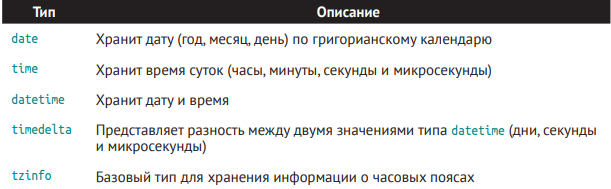

### Преобразование между строкой и datetime

In [10]:
day1 = datetime(2017,12,30,21,59)
day1

datetime.datetime(2017, 12, 30, 21, 59)

In [11]:
str(day1)    # получить строку с датой в формате по УМОЛЧАНИЮ

'2017-12-30 21:59:00'

In [12]:
# но можно отрегулировать формат строки даты и времени c помощью strftime

day1.strftime('%Y год, %m месяц, %d день!!' )

'2017 год, 12 месяц, 30 день!!'

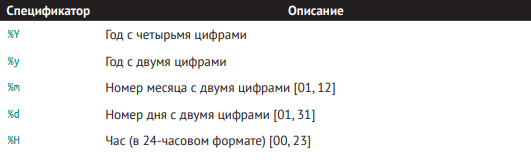
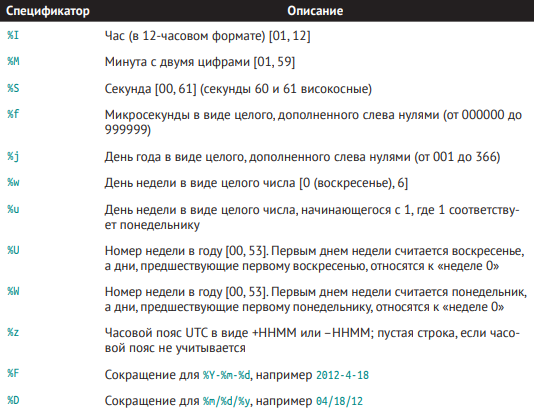

In [13]:
words_date = ['2017-03', '2018-03', '', None, '2017']

pd.to_datetime(words_date)   # метод пандас, разбирающий различные представления даты

DatetimeIndex(['2017-03-01', '2018-03-01', 'NaT', 'NaT', '2017-01-01'], dtype='datetime64[ns]', freq=None)

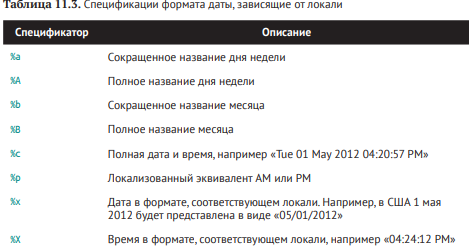

### Основы работы с временными рядами

In [14]:
temperatures_data = pd.read_csv('daily-minimum-temperatures-in-me.csv')
temperatures_data

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
3645,12/27/1990,14
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7


In [15]:
temperatures_data['Date'] = pd.to_datetime(temperatures_data['Date'])
temperatures_data   # В pandas временные метки хранятся в типе данных NumPy datetime64 с наносекундным разрешением

,Date,Daily minimum temperatures
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [16]:
series_date = temperatures_data['Date']

In [17]:
temperatures_data.set_index('Date', inplace=True)

In [18]:
temperatures_data.index[0]  # Cкалярные значения в  индексе DatetimeIndex  – это объекты pandas типа Timestamp

Timestamp('1981-01-01 00:00:00')

In [19]:
temperatures_data 

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14
1990-12-28,13.6
1990-12-29,13.5


### Индексирование, выборка, подмножества

In [21]:
temperatures_data[datetime(1987,12,1):] # можно индексировать срезами datetime

,Daily minimum temperatures
Date,
1987-12-01,11.9
1987-12-02,11.1
1987-12-03,8.2
1987-12-04,9.4
1987-12-05,12.7
...,...
1990-12-27,14
1990-12-28,13.6
1990-12-29,13.5


In [22]:
temperatures_data['1981-01'].head()  # можно индексировать год-месяц (или просто год)

C:\Users\dermi\AppData\Local\Temp\ipykernel_16200\425402088.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  temperatures_data['1981-01'].head()  # можно индексировать год-месяц (или просто год)


,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [23]:
temperatures_data['1989':]    # можно индексировать СРЕЗАМИ

,Daily minimum temperatures
Date,
1989-01-01,14.3
1989-01-02,17.4
1989-01-03,18.5
1989-01-04,16.8
1989-01-05,11.5
...,...
1990-12-27,14
1990-12-28,13.6
1990-12-29,13.5


### Временные ряды с неуникальными индексами

In [24]:
temperatures_data.index.is_unique   # уникальные ли индексы даты

True

Пусть требуется агрегировать данные с неуникальными временными метками. Одно из возможных решений – воспользоваться методом groupby с параметром level=0 (один-единственный уровень)

## Диапазоны дат, частоты и сдвиг

In [25]:
# более компактное название столбца
temperatures_data = temperatures_data.rename({'Daily minimum temperatures':'min_t'},axis=1)

In [26]:
# преобразуме значения к типу float 

temperatures_data['min_t'] = temperatures_data['min_t'].astype('float',errors='ignore')
temperatures_data

,min_t
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14
1990-12-28,13.6
1990-12-29,13.5


In [27]:
# заменим нечисловые значения на Nan

temperatures_data['min_t'] = pd.to_numeric(temperatures_data['min_t'],errors='coerce') 
temperatures_data   

,min_t
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


 Например, временной ряд из нашего примера можно преобразовать в ряд с частотой один день, месяц или год

In [28]:
yers_t = temperatures_data.resample('Y')   # ряд с частотой в год (Y)

In [29]:
yers_t.count()   # можно применить функцию к такому ряду 

,min_t
Date,
1981-12-31,365
1982-12-31,363
1983-12-31,365
1984-12-31,364
1985-12-31,365
1986-12-31,365
1987-12-31,365
1988-12-31,365
1989-12-31,365


In [30]:
yers_t.mean()

,min_t
Date,
1981-12-31,11.517260
1982-12-31,10.840220
1983-12-31,11.187397
1984-12-31,10.620604
1985-12-31,11.137534
1986-12-31,10.803288
1987-12-31,10.853151
1988-12-31,11.972055
1989-12-31,11.261918


### Генерирование диапазонов дат

In [31]:
index = pd.date_range('2023 12 1','2023 12 31')  # даты дней декабря 2023
index   # объект DatetimeIndex

DatetimeIndex(['2023-12-01', '2023-12-02', '2023-12-03', '2023-12-04',
               '2023-12-05', '2023-12-06', '2023-12-07', '2023-12-08',
               '2023-12-09', '2023-12-10', '2023-12-11', '2023-12-12',
               '2023-12-13', '2023-12-14', '2023-12-15', '2023-12-16',
               '2023-12-17', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='D')

По умолчанию метод date_range генерирует временные метки с частотой один 
день. Если вы передаете ему только начальную или конечную дату, то должны 
задать также количество генерируемых периодов:

In [32]:
index = pd.date_range('2024',periods=10)   # первые 10 дней 2024 года
index

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10'],
              dtype='datetime64[ns]', freq='D')

In [33]:
# freq - частоты дат (по умолчанию 'D')

index = pd.date_range('2024',freq='YS',periods=5)  # пять лет с первого месяца
index

DatetimeIndex(['2024-01-01', '2025-01-01', '2026-01-01', '2027-01-01',
               '2028-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

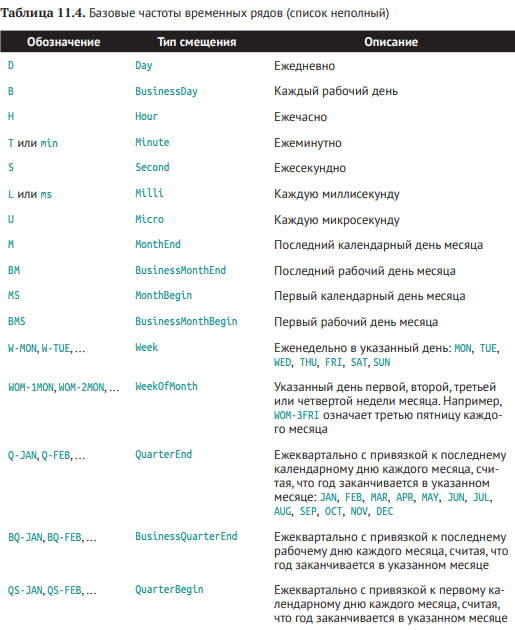
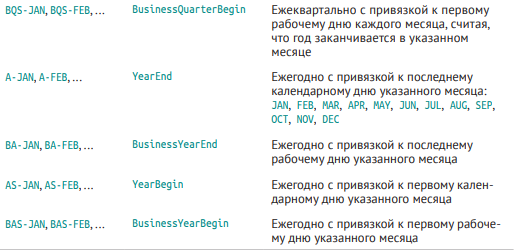

In [34]:
pd.date_range('2023 09 1 10:45', periods=5)  # указанное время распространяется на дальнейшие периоды

DatetimeIndex(['2023-09-01 10:45:00', '2023-09-02 10:45:00',
               '2023-09-03 10:45:00', '2023-09-04 10:45:00',
               '2023-09-05 10:45:00'],
              dtype='datetime64[ns]', freq='D')

In [35]:
pd.date_range('2023 09 1 10:45', periods=5, normalize=True)  # делает время по умолчанию 00 00 (без времени грубо говоря)

DatetimeIndex(['2023-09-01', '2023-09-02', '2023-09-03', '2023-09-04',
               '2023-09-05'],
              dtype='datetime64[ns]', freq='D')

### Частоты и смещения дат

Частота в  pandas состоит из базовой частоты и  кратности. Базовая частота 
обычно обозначается строкой, например 'M' означает раз в месяц, а 'H' – раз 
в час. Для каждой базовой частоты определен объект, называемый смещением 
даты (date offset).

In [36]:
pd.date_range('2023 12 28', '2023 12 31 23:59', freq='6H')  # отрезками по 6 часов 

DatetimeIndex(['2023-12-28 00:00:00', '2023-12-28 06:00:00',
               '2023-12-28 12:00:00', '2023-12-28 18:00:00',
               '2023-12-29 00:00:00', '2023-12-29 06:00:00',
               '2023-12-29 12:00:00', '2023-12-29 18:00:00',
               '2023-12-30 00:00:00', '2023-12-30 06:00:00',
               '2023-12-30 12:00:00', '2023-12-30 18:00:00',
               '2023-12-31 00:00:00', '2023-12-31 06:00:00',
               '2023-12-31 12:00:00', '2023-12-31 18:00:00'],
              dtype='datetime64[ns]', freq='6H')

In [37]:
 pd.date_range("2000-01-01", periods=10, freq="1h30min")   # можно и так :)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### Даты, связанные с неделей месяца

In [38]:
pd.date_range('2023 9 28', '2023 12 01', freq='W-FRI') # все пятницы до 1 декабря (включительно)

DatetimeIndex(['2023-09-29', '2023-10-06', '2023-10-13', '2023-10-20',
               '2023-10-27', '2023-11-03', '2023-11-10', '2023-11-17',
               '2023-11-24', '2023-12-01'],
              dtype='datetime64[ns]', freq='W-FRI')

In [39]:
pd.date_range('2023 9 28', '2023 12 01', freq='WOM-3FRI')  # каждая третья пятница МЕСЯЦА

DatetimeIndex(['2023-10-20', '2023-11-17'], dtype='datetime64[ns]', freq='WOM-3FRI')

### Сдвиг данных (с опережением и с запаздыванием)

Под «сдвигом» понимается перемещение данных назад и вперед по временной оси. У  объектов Series и  DataFrame имеется метод shift для «наивного» 
сдвига в обе стороны без модификации индекса

In [40]:
temperatures_data['смещение вверх'] = temperatures_data.shift(2)

In [41]:
temperatures_data # данные в новом столбце смещены вверх на 2, не меняя индекс

,min_t,смещение вверх
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,NaN
1981-01-03,18.8,20.7
1981-01-04,14.6,17.9
1981-01-05,15.8,18.8
...,...,...
1990-12-27,14.0,12.9
1990-12-28,13.6,14.6
1990-12-29,13.5,14.0


In [42]:
# указание частоты, чтобы сделать сдвиг ПО ВРЕМЕННЫМ МЕТКАМ, а не по значениям

temperatures_data.shift(2,freq='Y')  

,min_t,смещение вверх
Date,,
1982-12-31,20.7,NaN
1982-12-31,17.9,NaN
1982-12-31,18.8,20.7
1982-12-31,14.6,17.9
1982-12-31,15.8,18.8
...,...,...
1991-12-31,14.0,12.9
1991-12-31,13.6,14.6
1991-12-31,13.5,14.0


### Сдвиг дат с помощью смещений

In [43]:
 from pandas.tseries.offsets import Day, MonthEnd, Hour

In [44]:
Day(3)

<3 * Days>

In [45]:
now = datetime(2020, 5, 9)
now

datetime.datetime(2020, 5, 9, 0, 0)

In [46]:
now + Day(100)   # сдвиг на 100 дней

Timestamp('2020-08-17 00:00:00')

In [47]:
now + MonthEnd(1)   # сдвиг в конец первого месяца

Timestamp('2020-05-31 00:00:00')

Привязанные смещения можно использовать и для явного сдвига даты вперед и назад с помощью методов rollforward и rollback соответственно

In [48]:
now = datetime(2024,3,8)
now

datetime.datetime(2024, 3, 8, 0, 0)

In [49]:
sdvig = MonthEnd()
sdvig.rollback(now)   # сдвиг до конца предыдущего месяца

Timestamp('2024-02-29 00:00:00')

In [50]:
sdvig.rollforward(now)  # сдвиг до конца этого месяца

Timestamp('2024-03-31 00:00:00')

## Часовые пояса

In [51]:
 import pytz   # библиотека часовых поясов

In [52]:
pytz.all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

### Локализация и преобразование

По умолчанию временные ряды в pandas не учитывают часовые пояса.

In [53]:
dates = pd.date_range('2023 09',periods=4, freq='M')
ts = pd.Series(np.random.randint(1,11,len(dates)),index=dates)

ts  # (от тайм серис)

2023-09-30     4
2023-10-31     9
2023-11-30     3
2023-12-31    10
Freq: M, dtype: int32

In [54]:
print(ts.index.tz) # тайм зона не указана

None


In [55]:
# но её можно указать! ;)
pd.date_range('2024', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2024-01-01 00:00:00+00:00', '2024-01-02 00:00:00+00:00',
               '2024-01-03 00:00:00+00:00', '2024-01-04 00:00:00+00:00',
               '2024-01-05 00:00:00+00:00', '2024-01-06 00:00:00+00:00',
               '2024-01-07 00:00:00+00:00', '2024-01-08 00:00:00+00:00',
               '2024-01-09 00:00:00+00:00', '2024-01-10 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

UTC (Coordinated Universal Time) - это стандартизированная мировая система времени, которая используется как точная временная отметка для всего мира.

In [56]:
ts = ts.tz_localize('UTC')    # чтобы задать первый часовой пояс
ts

2023-09-30 00:00:00+00:00     4
2023-10-31 00:00:00+00:00     9
2023-11-30 00:00:00+00:00     3
2023-12-31 00:00:00+00:00    10
Freq: M, dtype: int32

In [57]:
ts.tz_convert('Europe/Moscow')  # для перевода из одного пояса в другой

2023-09-30 03:00:00+03:00     4
2023-10-31 03:00:00+03:00     9
2023-11-30 03:00:00+03:00     3
2023-12-31 03:00:00+03:00    10
Freq: M, dtype: int32

In [58]:
now = datetime.now()
now = pd.to_datetime(now)
now_msc = now.tz_localize('Europe/Moscow')
now_msc   # сейчас в Москве

Timestamp('2024-01-31 16:24:00.469609+0300', tz='Europe/Moscow')

In [59]:
argentina_time = now_msc.tz_convert('America/Argentina/Buenos_Aires')  # в Аргентине
argentina_time

Timestamp('2024-01-31 10:24:00.469609-0300', tz='America/Argentina/Buenos_Aires')

### Операции над объектами Timestamp с учетом часового пояса

In [60]:
stamp_moscow = pd.Timestamp('2020 12 31 23:55', tz='Europe/Moscow')
stamp_moscow

Timestamp('2020-12-31 23:55:00+0300', tz='Europe/Moscow')

В объектах Timestamp, учитывающих часовой пояс, хранится временной штамп 
UTC в виде числа секунд от «эпохи» UNIX (1 января 1970); это значение инвариантно относительно преобразования из одного пояса в другой:

In [61]:
argentina_time.value

1706707440469609000

In [62]:
stamp_moscow + 2*Hour()  # операции с Timestamp

Timestamp('2021-01-01 01:55:00+0300', tz='Europe/Moscow')

### Операции над датами из разных часовых поясов

Если комбинируются два временных ряда с  разными часовыми поясами, то 
в результате получится UTC. Поскольку во внутреннем представлении временные метки хранятся в UTC, то операция не требует никаких преобразований.

In [63]:

now_london_time = pd.Timestamp('2023 09 28 22:00',tz='Europe/London')
now_moscow_time = pd.Timestamp(datetime.now(),tz='Europe/Moscow')

series_time1 = pd.Series([500], index=[now_moscow_time])
series_time2 = pd.Series([600], index= [now_london_time])
print(series_time1)
print(series_time2)

2024-01-31 16:24:10.621073+03:00    500
dtype: int64
2023-09-28 22:00:00+01:00    600
dtype: int64


In [64]:
series_time1 + series_time2  # почему NaN хнык

2023-09-28 21:00:00+00:00          NaN
2024-01-31 13:24:10.621073+00:00   NaN
dtype: float64

## Периоды и арифметика периодов

Периоды – это промежутки времени: дни, месяцы, кварталы, годы. Этот тип 
данных представлен классом pandas.Period, конструктор которого принимает 
строку или число и поддерживаемую частоту

In [65]:
p = pd.Period('2023 09')  # период сентября 2023
p

Period('2023-09', 'M')

In [66]:
p + 1  # плюс один месяц (октябрь 2023)

Period('2023-10', 'M')

In [67]:
p - pd.Period('2023 07')   # разница в виде смещения даты

<2 * MonthEnds>

In [68]:
# Регулярные диапазоны периодов строятся с помощью функции period_range

periods = pd.period_range('2020 01 01','2021 01 01', freq='M')
periods

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01'],
            dtype='period[M]')

### Преобразование частоты периода

In [69]:
p = pd.Period('2023')
p

Period('2023', 'A-DEC')

Периоды и  объекты PeriodIndex можно преобразовать с  изменением частоты, 
воспользовавшись методом asfreq.

In [70]:
p.asfreq('D',how='start')

Period('2023-01-01', 'D')

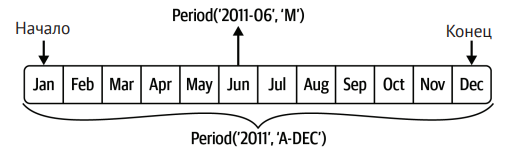

### Квартальная частота периода

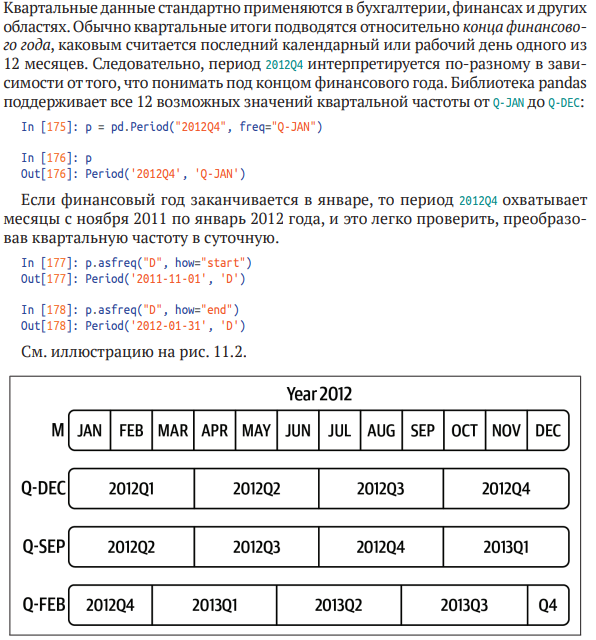

### Преобразование временных меток в периоды и обратно

In [71]:
series_date

0      1981-01-01
1      1981-01-02
2      1981-01-03
3      1981-01-04
4      1981-01-05
          ...    
3645   1990-12-27
3646   1990-12-28
3647   1990-12-29
3648   1990-12-30
3649   1990-12-31
Name: Date, Length: 3650, dtype: datetime64[ns]

In [72]:
periods_date = temperatures_data['min_t'].to_period(freq='Y')
periods_date  # в объект периода

Date
1981    20.7
1981    17.9
1981    18.8
1981    14.6
1981    15.8
        ... 
1990    14.0
1990    13.6
1990    13.5
1990    15.7
1990    13.0
Freq: A-DEC, Name: min_t, Length: 3650, dtype: float64

In [73]:
# для обратного преобразования

periods_date.to_timestamp()

Date
1981-01-01    20.7
1981-01-01    17.9
1981-01-01    18.8
1981-01-01    14.6
1981-01-01    15.8
              ... 
1990-01-01    14.0
1990-01-01    13.6
1990-01-01    13.5
1990-01-01    15.7
1990-01-01    13.0
Name: min_t, Length: 3650, dtype: float64

### Создание PeriodIndex из массивов

In [74]:
index = pd.PeriodIndex(year=[2012, 2012, 2014, 2018, 2022], month=[1, 2, 3, 3, 5], freq='M')
index

PeriodIndex(['2012-01', '2012-02', '2014-03', '2018-03', '2022-05'], dtype='period[M]')

## Передискретизация и преобразование частоты

Под передискретизацией понимается процесс изменения частоты временного ряда. Агрегирование с переходом от высокой частоты к низкой называется 
понижающей передискретизацией, а переход от низкой частоты к более высокой – повышающей передискретизацией. Не  всякая передискретизация попадает в одну из этих категорий; например, преобразование частоты W-WED (еженедельно по средам) в W-FRI не повышает и не понижает частоту.

- метод resample()

In [75]:
temperatures_data = temperatures_data.drop('смещение вверх',axis=1)
temperatures_data

,min_t
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [76]:
group_years = temperatures_data.resample('Y')   # группировка данных по частотам
group_years

In [77]:
group_years.count()  # количество наблюдений температур по годам 

,min_t
Date,
1981-12-31,365
1982-12-31,363
1983-12-31,365
1984-12-31,364
1985-12-31,365
1986-12-31,365
1987-12-31,365
1988-12-31,365
1989-12-31,365


In [78]:
group_years.mean()   # средняя температура по годам

,min_t
Date,
1981-12-31,11.517260
1982-12-31,10.840220
1983-12-31,11.187397
1984-12-31,10.620604
1985-12-31,11.137534
1986-12-31,10.803288
1987-12-31,10.853151
1988-12-31,11.972055
1989-12-31,11.261918


In [79]:
temperatures_data.resample('M', kind='period').count()  
# kind="period" указывает, что результирующий объект будет иметь тип "период" (Period), а не "дата и время" (Datetime)

,min_t
Date,
1981-01,31
1981-02,28
1981-03,31
1981-04,30
1981-05,31
...,...
1990-08,31
1990-09,30
1990-10,31


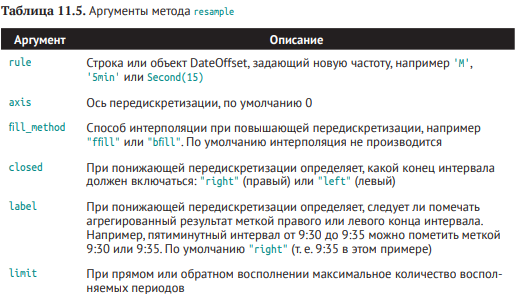
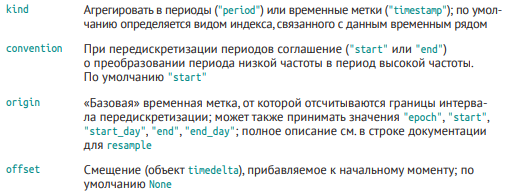

### Понижающая передискретизация

----

Понижающей передискретизацией называется агрегирование данных с целью 
понижения и  регуляризации частоты. Агрегируемые данные необязательно 
исправлять часто; желаемая частота определяет границы интервалов, разбивающих агрегируемые данные на порции. Например, для преобразования к месячному периоду, "M" или "BM", данные нужно разбить на интервалы продолжительностью один месяц. Говорят, что каждый интервал полуоткрыт; любая 
точка может принадлежать только одному интервалу, а их объединение должно покрывать всю протяженность временного ряда. Перед тем как выполнять 
понижающую передискретизацию данных методом resample, нужно решить для 
себя следующие вопросы:
 - какой конец интервала будет включаться;
 - помечать ли агрегированный интервал меткой его начала или конца
 ---------------------

In [ ]:
dates = pd.date_range('2024',periods=13, freq='T')
ts = pd.Series(np.arange(len(dates)),index=dates)
ts

In [ ]:
ts.resample('5min').sum()  # пятиминутные группы (левый конец вкл - правый выкл)

In [ ]:
#  Если задать параметр closed='right', то будет включаться правый конец интервала:

ts.resample('5min',closed='right').sum()

In [ ]:
ts.resample("5min", closed="right", label="right").sum()  # чтобы использовать метки левых концов

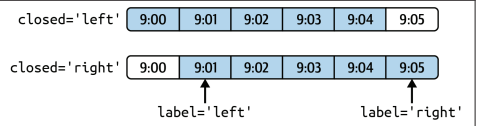

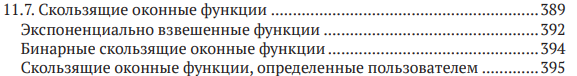